<a href="https://colab.research.google.com/github/albertofernandezvillan/algorithm-coding/blob/main/fibonacci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fibonacci numbers

The Fibonacci numbers are the numbers in the following integer sequence.
`0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...` 

In mathematical terms, the sequence `Fn` of Fibonacci numbers is defined by the recurrence relation `Fn = Fn-1 + Fn-2`, with seed values `F0 = 0` and `F1 = 1`.

**Problem**: Given a number `n`, print `n-th` Fibonacci Number. 

In [1]:
def fib_rec(n):
  if n <= 1:
    return n
  return fib_rec(n-1) + fib_rec(n-2)

In [2]:
print(fib_rec(9))

34


**[Time complexity of Fibonacci](https://syedtousifahmed.medium.com/fibonacci-iterative-vs-recursive-5182d7783055)**: [In the image below](https://www.youtube.com/watch?v=ncpTxqK35PI), as we are stating that `T(n-2) ~ T(n-1)` we are going to obtain an upper bound time complexity result (because we know that `T(n-2) < T(n-1)`. 



```
T(n) = 2 * T(n-1) + C               (C=4)
     = 2 * (2T(n-2) + C) + C
     = 4 * T(n-2) + 3 * C
     = 8 * T(n-3) + 7 * C

     = 2^k * T(n-k) + (2^k-1) * C

     Let's find the value of k for which: n - k = 0
     k = n

T(n) = 2^n * T(0) + (2^n - 1) * C

i.e. T(n) ~ 2^n
```



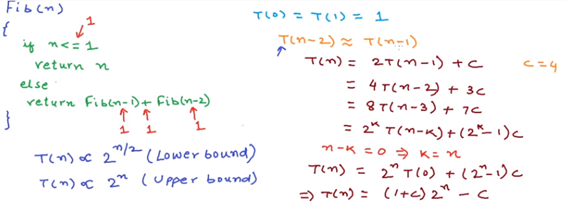

If we want to calculate a lower bound: 

```
T(n) = T(n-1) + T(n-2) + c
     = 2T(n-2) + c    //from the approximation T(n-1) ~ T(n-2)
     = 2*(2T(n-4) + c) + c
     = 4T(n-4) + 3c
     = 8T(n-6) + 7c
     = 2^k * T(n - 2k) + (2^k - 1)*c
Let's find the value of k for which: n - 2k = 0
k = n/2
T(n) = 2^(n/2) * T(0) + (2^(n/2) - 1)*c
     = 2^(n/2) * (1 + c) - c
i.e. T(n) ~ 2^(n/2)
```



**Space complexity of the recursive approach**:  The space complexity of this implementation equals `O(n)`. This is because the function calls that are being executed recursively may seem, at first glance, being executed concurrently, but in reality, they are instead being executed sequentially. [Sequential execution guarantees that the stack size will never exceed the depth of the calls' tree](https://stackoverflow.com/questions/28756045/what-is-the-space-complexity-of-a-recursive-fibonacci-algorithm).

Therefore, we can conclude that, in the recursive version of Fibonacci:

```
def fib_rec(n):
  if n <= 1:
    return n
  return fib_rec(n-1) + fib_rec(n-2)
```

Time complexity is exponential `O(2^n)` and space complexity is `O(n)`. Note that  space complexity is `O(n)` if we consider the function call stack size, otherwise `O(1)`.

We can observe that this implementation does a lot of repeated work. See the following recursion tree for `fib(5)`:

```
                          fib(5)   
                     /                \
               fib(4)                fib(3)   
             /        \              /       \ 
         fib(3)      fib(2)         fib(2)   fib(1)
        /    \       /    \        /      \
  fib(2)   fib(1)  fib(1) fib(0) fib(1) fib(0)
  /     \
fib(1) fib(0)
```



As we can see, for example, we are calculating fib(3) twice. We can avoid the repeated work done in the recursive approach by storing the Fibonacci numbers calculated so far using Dynamic Programming (DP). 

In Dynamic Programming we store the solution to the problem so we do not need to recalculate it. By finding the solutions for every single sub-problem, we can tackle the original problem itself. Memoization is the act of storing a solution.

We can store the results of previously solved subproblems in a data structure like a list (e.g `memo`). Once a subproblem is solved we will store the solution in `memo`.

In [12]:
N = 20 
memo = [-1] * N

def fib_dp(n):
    if n <= 1:
      return n

    if memo[n] != -1:
        return memo[n]
    
    memo[n] = fib_dp(n-1) + fib_dp(n-2)
    
    return memo[n]

print(fib_dp(9))

34


Another approach for DP is the following:

In [20]:
def fib_dp_2(n):
    # Taking 1st two fibonacci nubers as 0 and 1:
    mem = [0, 1]
     
    for i in range(2, n+1):
        mem.append(mem[i-1] + mem[i-2])
    return mem[n]
     
print(fib_dp_2(9))

34


We can optimize the space used in the previous method by storing the previous two numbers only because that is all we need to get the next Fibonacci number in series. 

In [15]:
def fib_dp_2_opt(n):
  if n<= 1:
    return n
  
  a, b = 0, 1

  for i in range(2, n+1):
    res = a + b
    a = b
    b = res
  
  return res

print(fib_dp_2_opt(9))

34



*   Time Complexity:O(n) 
*   Extra Space: O(1)

For more programs to calculate Fibonacci numbers see [here](https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/).




For more information about Dynamic Programming see [here](https://skerritt.blog/dynamic-programming/)